In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
data=pd.read_csv("Data Sets for AFDD Evauluation of Building FDD Algorithms/MZVAV-1.csv")

## Preprocessing


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272160 entries, 0 to 272159
Data columns (total 18 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Datetime                                        272160 non-null  object 
 1   AHU: Supply Air Temperature                     272160 non-null  float64
 2   AHU: Supply Air Temperature Set Point           272160 non-null  float64
 3   AHU: Outdoor Air Temperature                    272160 non-null  float64
 4   AHU: Mixed Air Temperature                      272160 non-null  float64
 5   AHU: Return Air Temperature                     272160 non-null  float64
 6   AHU: Supply Air Fan Status                      272160 non-null  int64  
 7   AHU: Return Air Fan Status                      272160 non-null  int64  
 8   AHU: Supply Air Fan Speed Control Signal        272160 non-null  float64
 9   AHU: Return Air Fan Speed 

In [32]:
data.head()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,1/30/2017 0:00,68.00,55.04,32.00,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
1,1/30/2017 0:01,67.99,55.04,32.00,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
2,1/30/2017 0:02,67.99,55.04,-5.93,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
3,1/30/2017 0:03,67.99,55.04,-5.88,66.71,74.04,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
4,1/30/2017 0:04,67.99,55.04,-5.83,66.71,73.56,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0


In [33]:
# Check for null values
data.isnull().sum()

Datetime                                          0
AHU: Supply Air Temperature                       0
AHU: Supply Air Temperature Set Point             0
AHU: Outdoor Air Temperature                      0
AHU: Mixed Air Temperature                        0
AHU: Return Air Temperature                       0
AHU: Supply Air Fan Status                        0
AHU: Return Air Fan Status                        0
AHU: Supply Air Fan Speed Control Signal          0
AHU: Return Air Fan Speed Control Signal          0
AHU: Outdoor Air Damper Control Signal            0
AHU: Return Air Damper Control Signal             0
AHU: Cooling Coil Valve Control Signal            0
AHU: Heating Coil Valve Control Signal            0
AHU: Supply Air Duct Static Pressure Set Point    0
AHU: Supply Air Duct Static Pressure              0
Occupancy Mode Indicator                          0
Fault Detection Ground Truth                      0
dtype: int64

In [34]:
# Count the occurrences of 0s and 1s in the Fault Detection Ground Truth 
binary_counts = data['Fault Detection Ground Truth'].value_counts()

print(binary_counts)

Fault Detection Ground Truth
1    233280
0     38880
Name: count, dtype: int64


# Preprocessing 

In [35]:
# Convert Datetime column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])


In [36]:
# Extract day of the week, hour, and minute
data['day_of_week'] = data['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
data['hour'] = data['Datetime'].dt.hour
data['minute'] = data['Datetime'].dt.minute


In [37]:
# Define Occupied/Unoccupied mode
def define_mode(row):
    if row['day_of_week'] < 6 and 6 <= row['hour'] < 20:  # Monday-Saturday, 6 AM to 8 PM
        return 1
    else:
        return 0

data['mode'] = data.apply(define_mode, axis=1)

In [38]:
data.head()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,...,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth,day_of_week,hour,minute,mode
0,2017-01-30 00:00:00,68.00,55.04,32.00,68.00,75.20,0,0,0.0,0.0,...,0.0,0,0.04,0.0,0,0,0,0,0,0
1,2017-01-30 00:01:00,67.99,55.04,32.00,66.71,75.20,0,0,0.0,0.0,...,0.0,0,0.04,0.0,0,0,0,0,1,0
2,2017-01-30 00:02:00,67.99,55.04,-5.93,66.71,74.45,0,0,0.0,0.0,...,0.0,0,0.04,0.0,0,0,0,0,2,0
3,2017-01-30 00:03:00,67.99,55.04,-5.88,66.71,74.04,0,0,0.0,0.0,...,0.0,0,0.04,0.0,0,0,0,0,3,0
4,2017-01-30 00:04:00,67.99,55.04,-5.83,66.71,73.56,0,0,0.0,0.0,...,0.0,0,0.04,0.0,0,0,0,0,4,0


### Univariate Analysis

In [39]:
num_cols = data.select_dtypes(include=['int64','float64']).columns

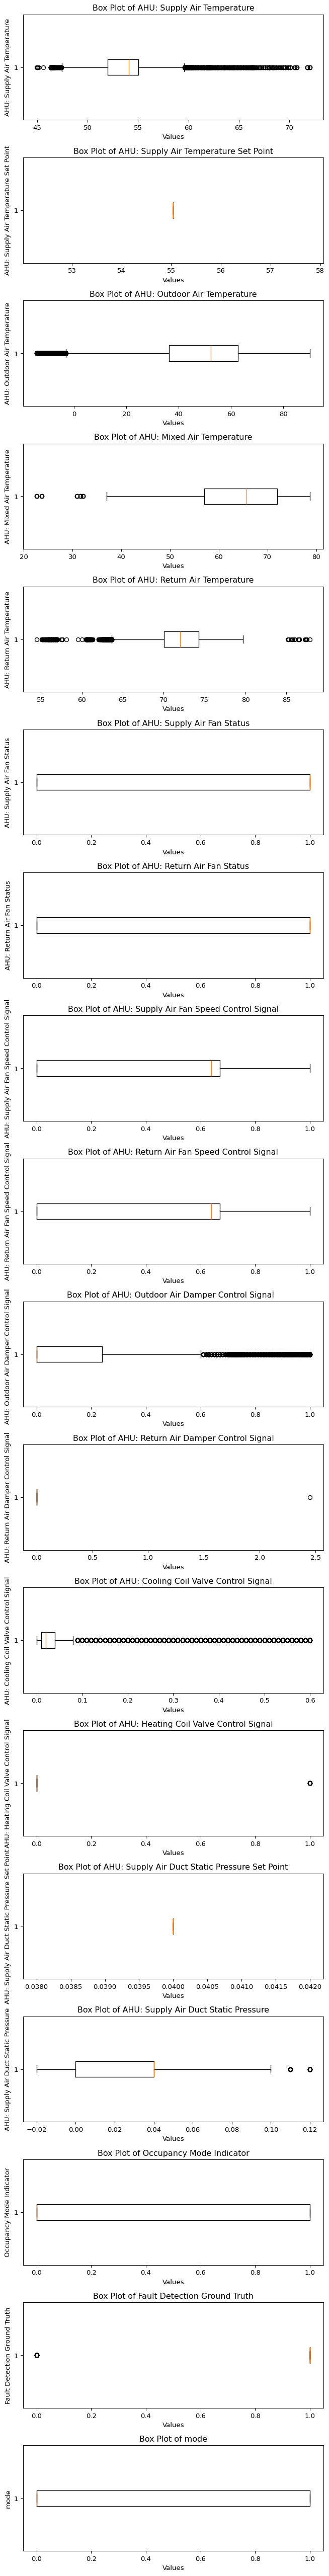

In [40]:
# Create subplots for numerical columns
fig, axs = plt.subplots(len(num_cols), 1, dpi=95, figsize=(7, len(num_cols) * 3))

for i, col in enumerate(num_cols):
    axs[i].boxplot(data[col].dropna(), vert=False)  # Drop NaN values for box plot
    axs[i].set_title(f"Box Plot of {col}")
    axs[i].set_xlabel("Values")
    axs[i].set_ylabel(col)

# Adjust layout and display the plot for numerical columns
plt.tight_layout()
plt.show()

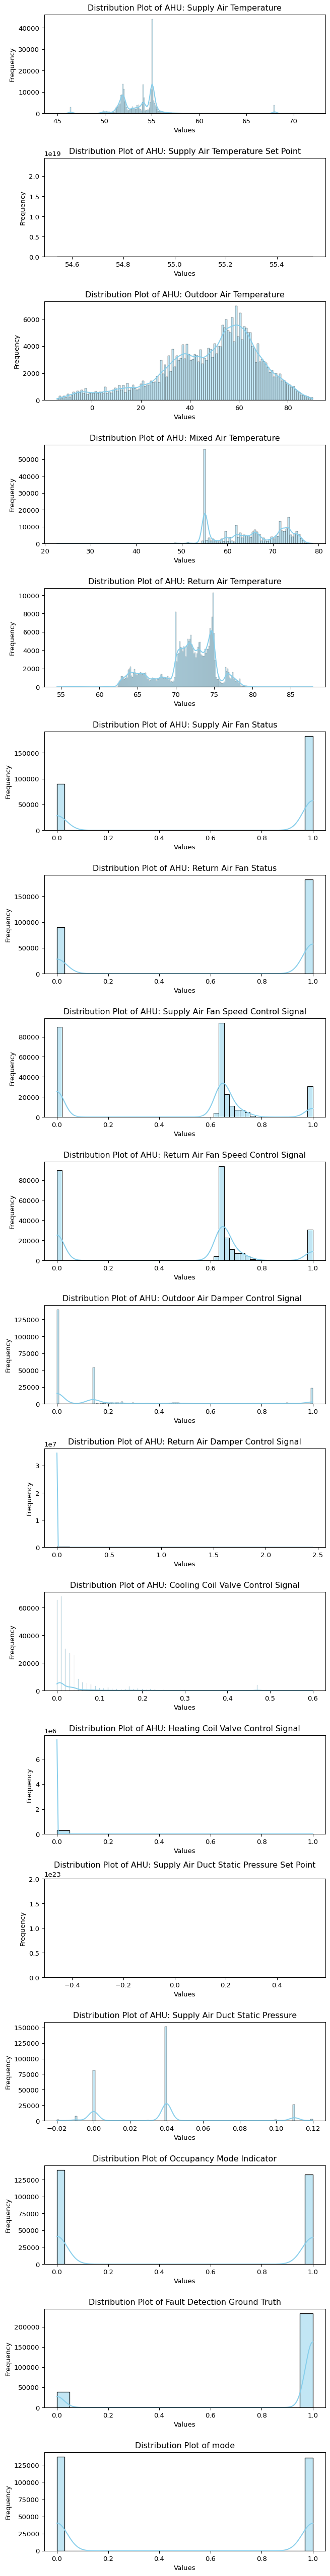

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for numerical columns
fig, axs = plt.subplots(len(num_cols), 1, dpi=95, figsize=(7, len(num_cols) * 3))

for i, col in enumerate(num_cols):
    sns.histplot(data[col].dropna(), kde=True, ax=axs[i], color='skyblue')  # KDE curve added
    axs[i].set_title(f"Distribution Plot of {col}")
    axs[i].set_xlabel("Values")
    axs[i].set_ylabel("Frequency")

# Adjust layout and display the plot for numerical columns
plt.tight_layout()
plt.show()
